# Edit distance problem question with example:
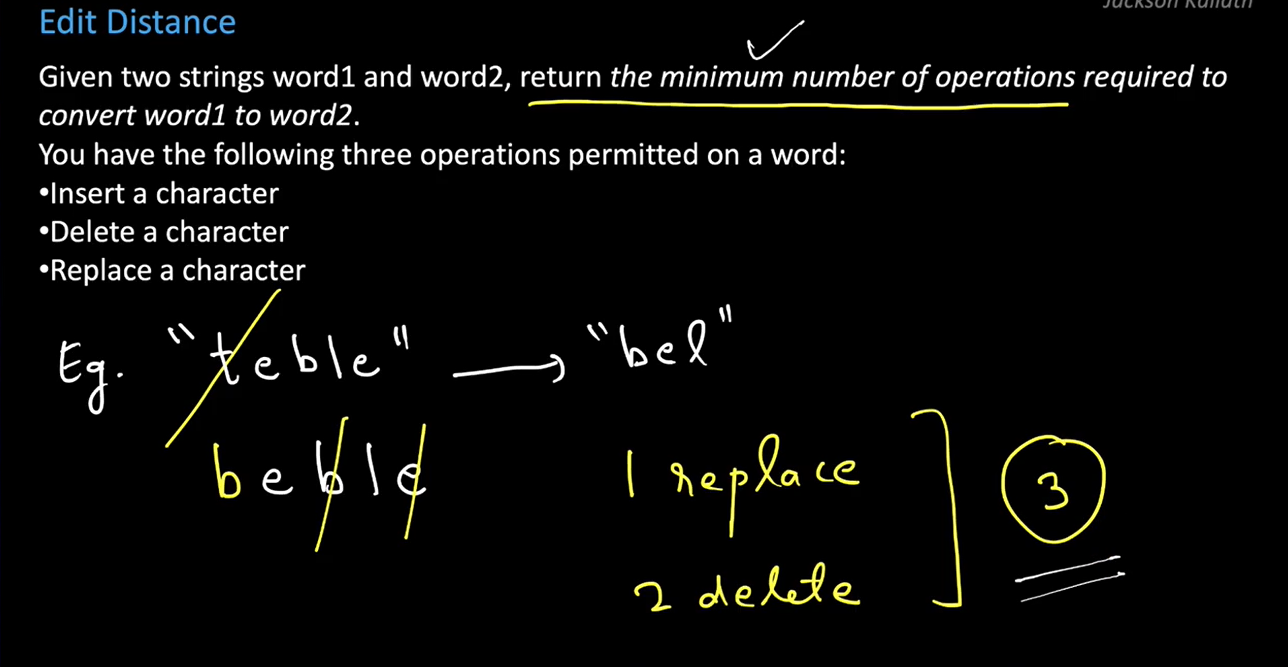
### as here in example word1= teble and wrod2 = bel 
### so for converting wrod1 to wrod2 with minimum number of operations would be :
- word1=  beble   [replacing 't' with 'b']
- word1=  bele   [delete 'b']
- word1=  bel   [delete 'e']  
- henace word1 = bel = word2  [need minimum 3 operations ; 1 replacement & 2 deletion operation ]
# Edit distance problem sidenote:
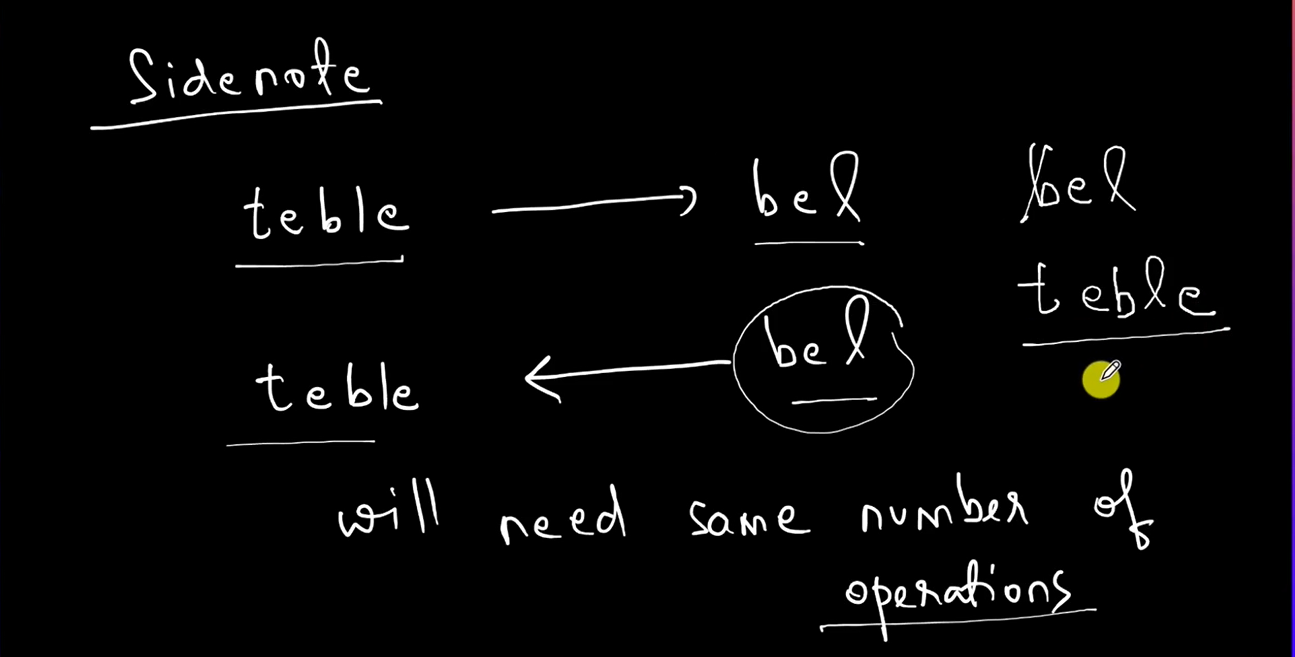
### here important things to understand is that if converting word1 to word2 takes minimum 3 operations then converting word2 back to word1 would also take three operations [type of operations can be change]
# Edit distance problem clarifying question:
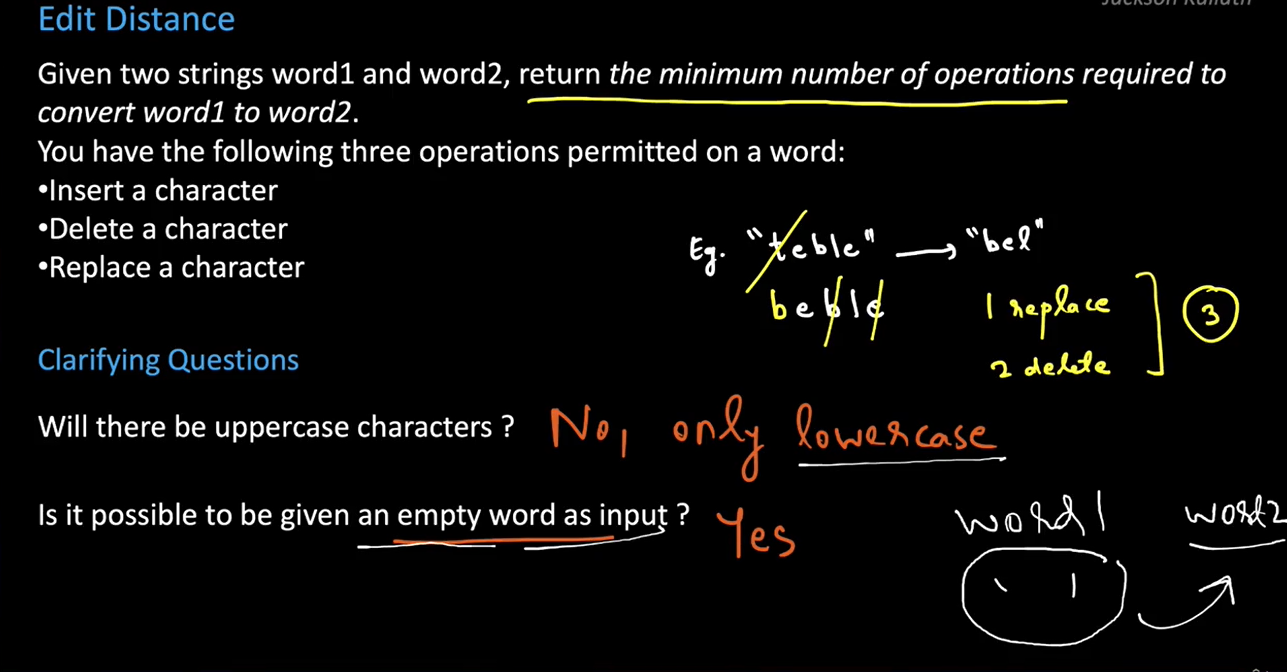
# Edit distance problem test-cases:
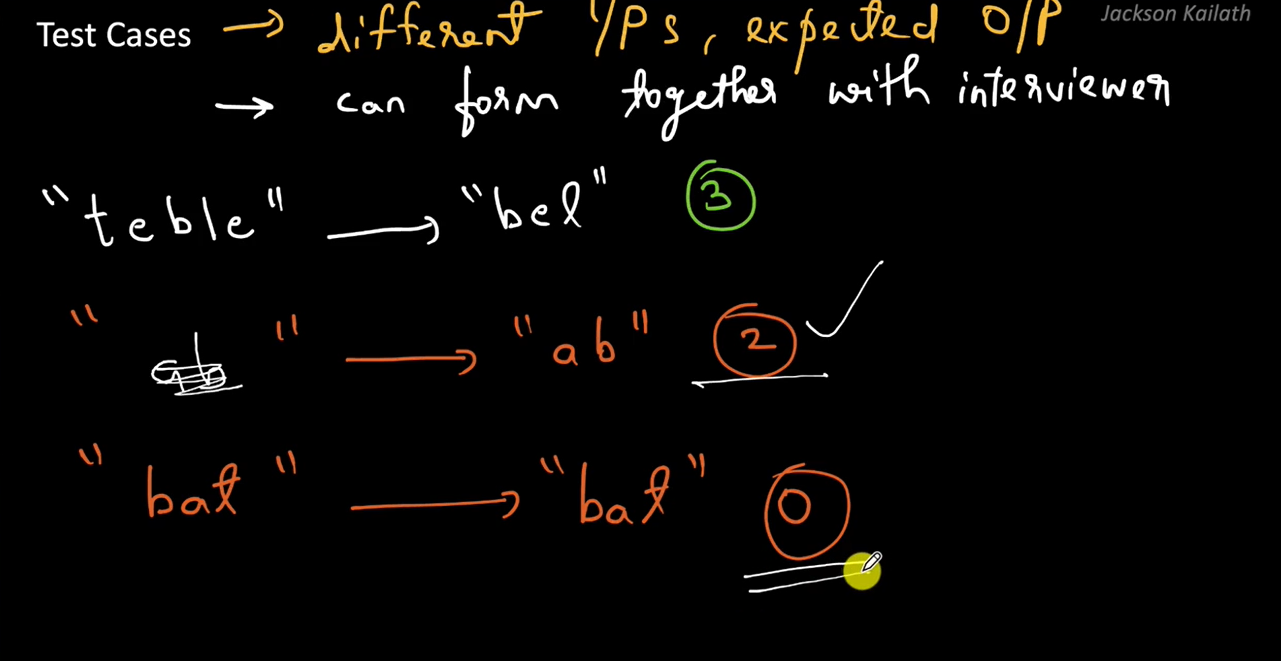
# Coding Exercise: Edit Distance
### Given two strings word1 and word2, return the minimum number of operations required to convert word1 to word2.

### You have the following three operations permitted on a word:

- Insert a character

- Delete a character

- Replace a character

### Example: 

- Input: word1 = "hodse", word2 = "dos"
- Output: 3
### Explanation: 
- hodse -> dodse (replace 'h' with 'd')
- dodse -> dose (remove 'd')
- dose -> dos (remove 'e')
# Why this problem(EDit distance) is a type of or variations of LCS problem [how this particular problem has DP-features]:
### as we know that in the LCS problem there're scnerios while traversing over two strings:
### if chars on indexes of both string matched (equal) then we will move both the indexes to the next.
### if chars on indexes of both string NOT matched (NOT equal) then we will move one of the index to the next while remain other index of string same(constant)    or we w'll do the vice-versa of this.

### similarly here in Edit distance problem as well there're scenerios while traversing over two strings:
### if chars on indexes of both string matched (equal) then No operations needed.
### if chars on indexes of both string NOT matched (NOTequal) then we will check possibilities among all 3 operations :-
1. delete operation [deleting char on current ongoing index of word1]
2. insert operation [inserting char on current ongoing index of word1] 
1. replace operation [replace char(based on char of word2) on current ongoing index of word1] 


### this edit distance problem also has optimal sub-structure feature of DP as here we're asked to find minimum operations to convert string1 to string2 or word1 to word2
### it will definately has overlapping-subproblems as we had in the case of LCS problem
### hence this problem can be solve using dynamic-programming
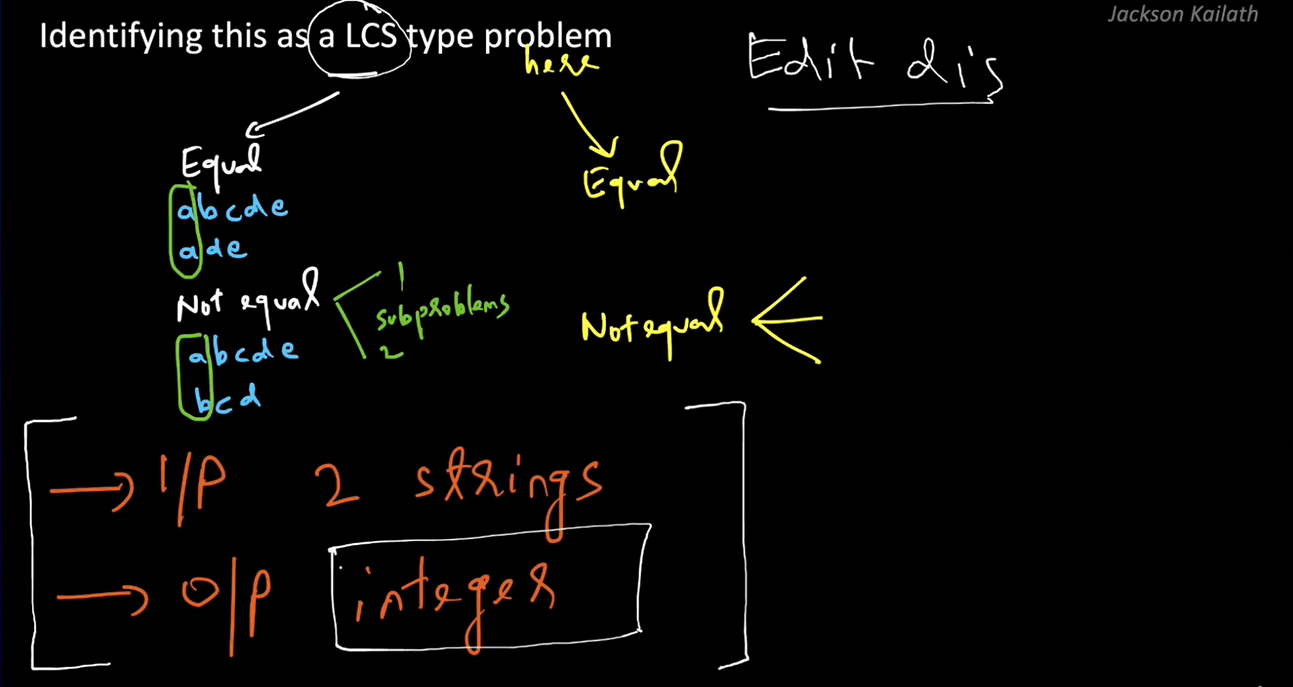

# Edit distance problem Recursion-approach :
### As we discussed already there're scenerios while traversing over two strings:
### 1.  if chars on indexes of both string matched (equal) 
- then No operations needed. ; and we have to move both the indexes of strings to the next
### 2. if chars on indexes of both string NOT matched (NOTequal) then we will check possibilities among all 3 operations and choose minimum value among them : min(Deletion-branch, Insertion-branch, replacement-branch) :-
[NOTE]: in following all the three operation we have to add 1 and then call recursive-fn with change in indexes repectively.
1. insert operation [inserting char before current ongoing index of word1]
- Here index of word1 remained constant while index of word2 moved to the next 
2. delete operation [deleting char on current ongoing index of word1]
- here index of word1 moved to the next while index of word2 remained constant
1. replace operation [replace char(based on char of word2) on current ongoing index of word1]
- here both the indexes of word1 & word2 moved to the next 
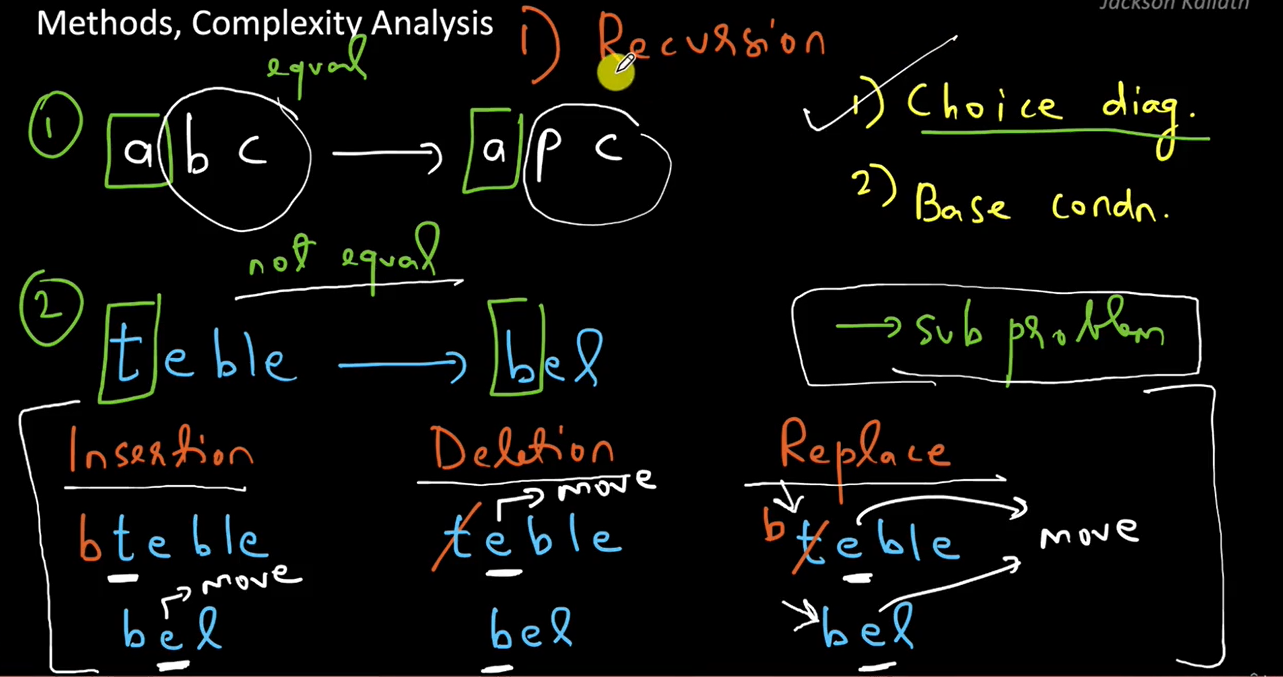
### base-cases (here are three scnerios can be occured):
### Scenerio-1 where both the indexes of word1 & word2 reached to the end of strings :
- means there's no chars in word-1 word2 so none of the three operation required ; return 0
### Scenerio-2 where the index of word1 reached to the end of strings; whereas in word2 there're some chars reamaining to be traverse :
- means we have to insert all those extra chars of word2 to the word1 ; it takes insertion operation extra-chars times ; return number of extra-chars simply
### Scenerio-3 where the index of word2 reached to the end of strings; whereas in word1 there're some chars reamaining to be traverse :
- means we have to delete all those extra chars of word1 ; it takes deletion operation extra-chars times ; return number of extra-chars simply
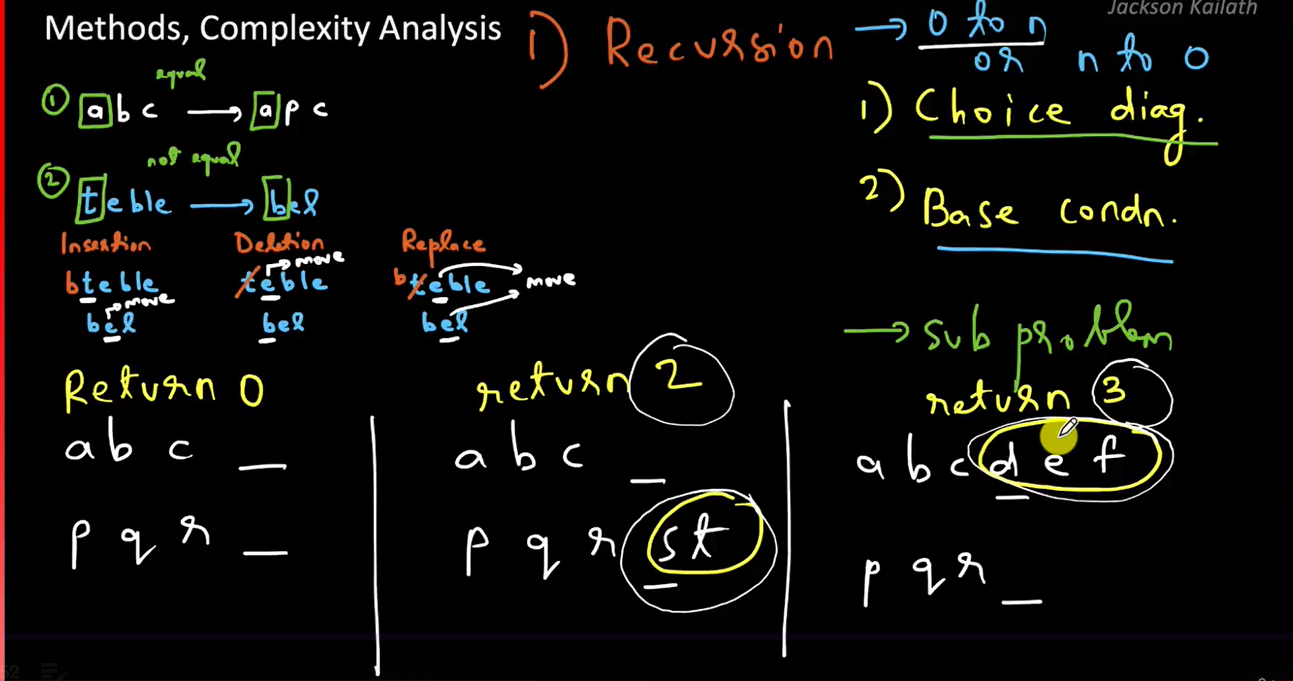

# Edit distance problem Recursion-approach[pseudo-code] :
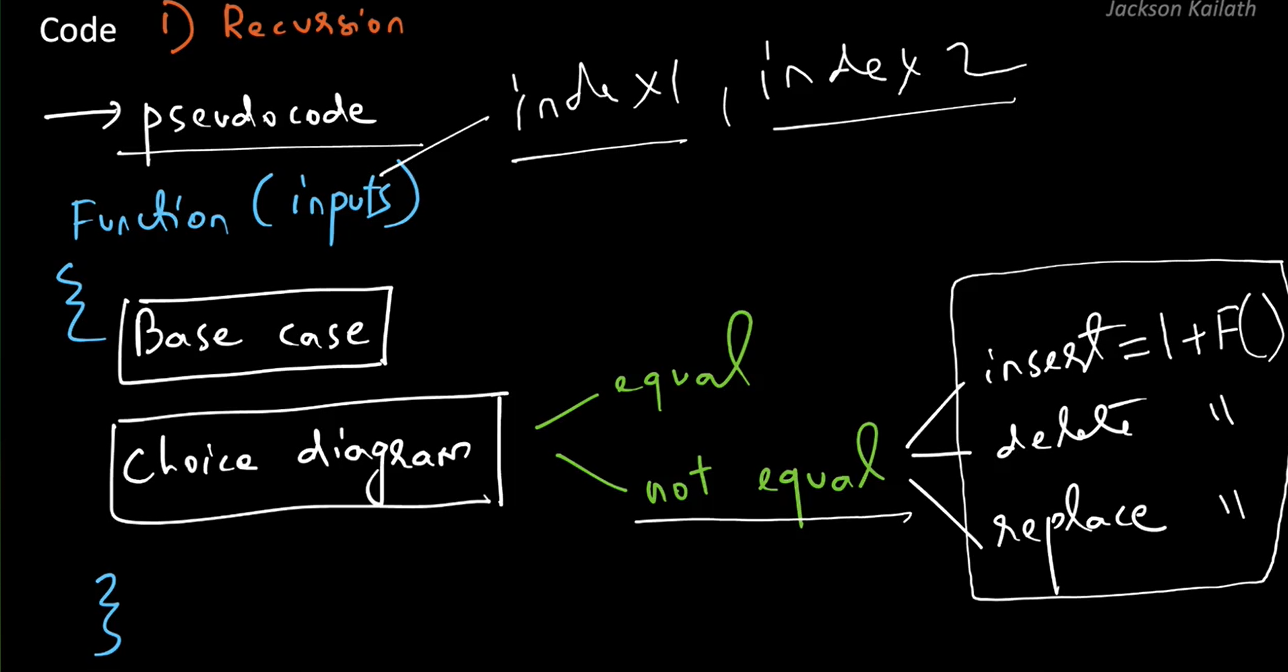

# Edit distance problem Recursion-tree [complexity-analysis]:
### recursion-tree with example ; see here maximum depth posible which;s equal to the total-length of word1 & word2 
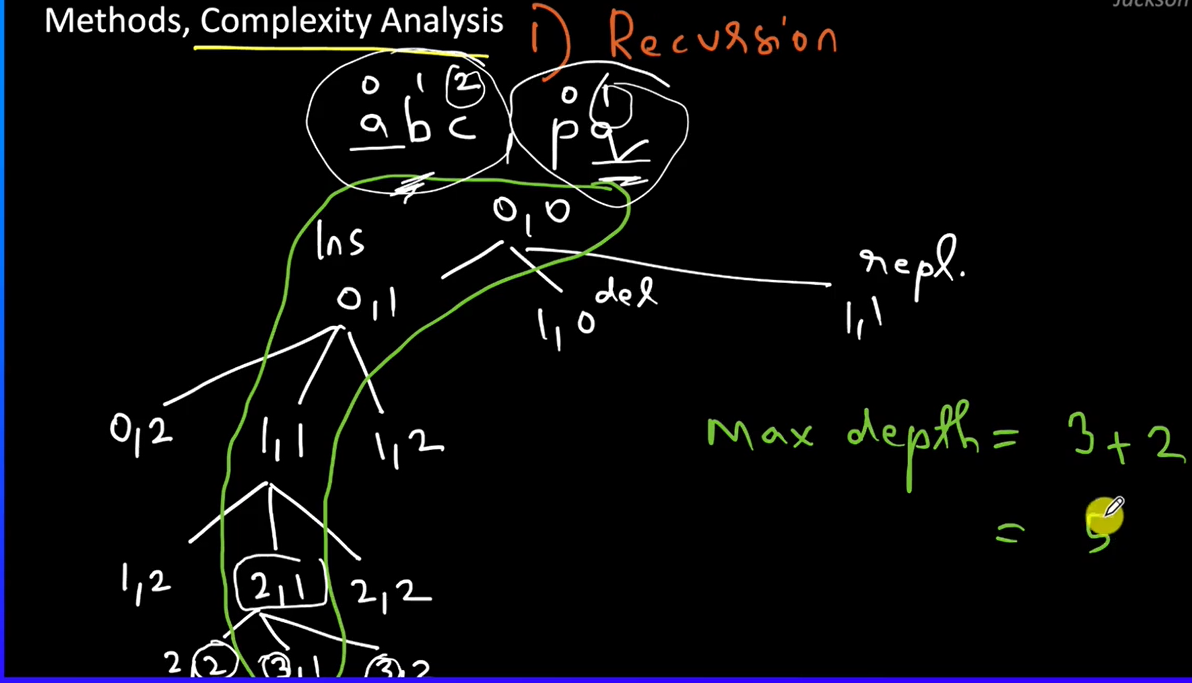
### complexity:
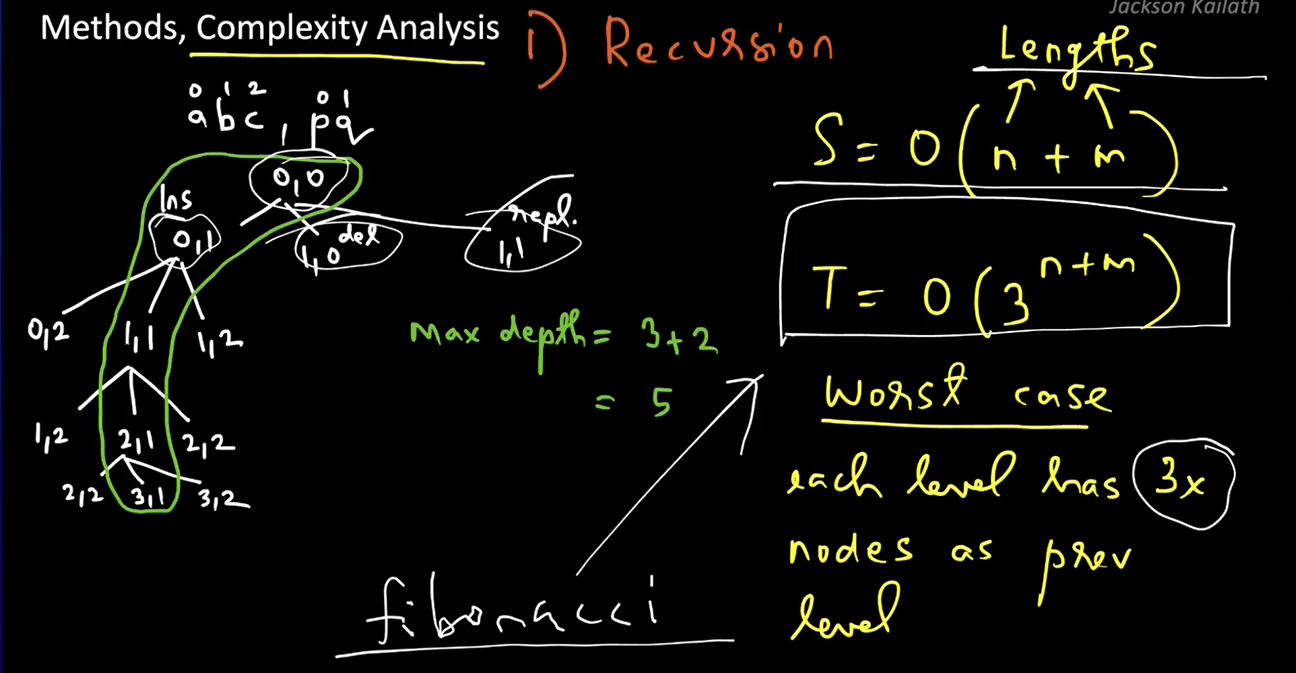

# Edit distance problem Recursion-approach[code-implementation] :
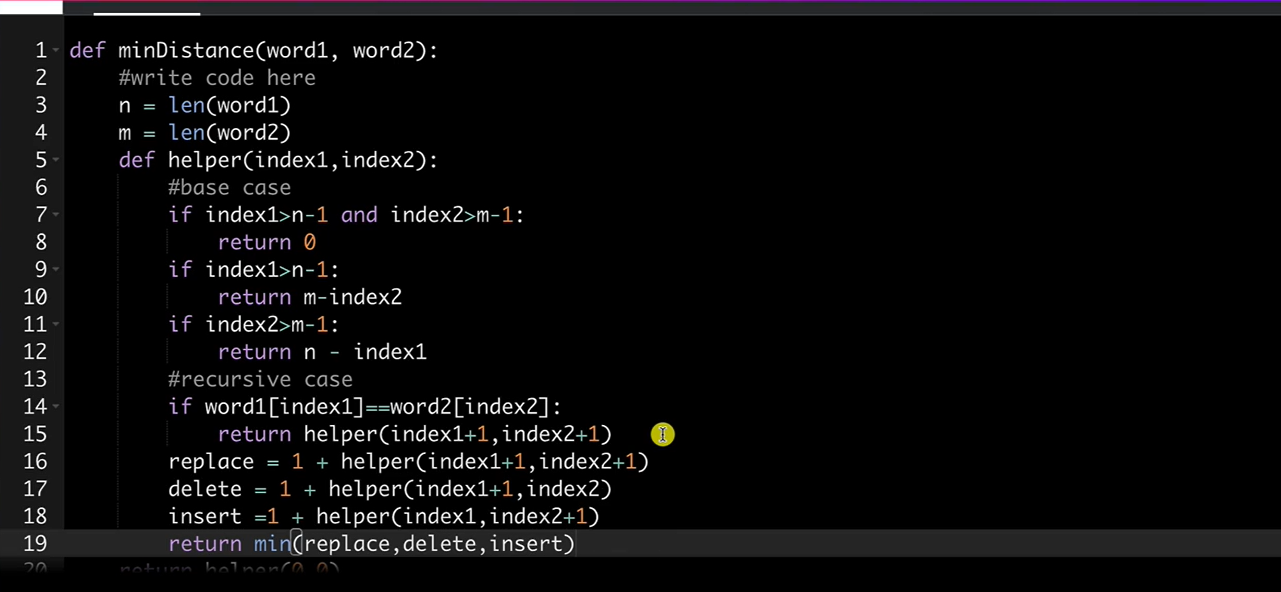

In [2]:
def EditDistance(word1, word2):
    n = len(word1)  # length of word1
    m = len(word2)  # length of word2
    # here is the recursive fn will take input as indexes of word1 & word2 respectively
    def min_distance_recursive(index1,index2):
        #base cases:  there're three bases-cases possible 
        #base-case-1: when both the indexes reached end of string on word1 & word2
        if index1>n-1 and index2>m-1:
            return 0    # none of operation required at this scenerio
        #base-case-2: when index1 reached the end of string on word1
        if index1>n-1:
            return m-index2  # then we have to perofrm insert-operation extra-chars(of word2) times  // simply return number of extra-chars of word2 
        #base-case-3: when index2 reached the end of string on word2
        if index2>m-1:
            return n - index1 # then we have to perform delete operation on extra-chars(of word1) times  //simply return number of extra-chars of word1       
        # recursive cases:
        # if both the words equal on both the indexes of word1 & word2
        if word1[index1]==word2[index2]:
            return min_distance_recursive(index1+1,index2+1)  #then move both the indexes to the next
        #else : if the words NOT equal on both the indexes of word1 & word2
        insert = 1 + min_distance_recursive(index1,index2+1)  # insert operation on word-1 , only index of word2 move to the next
        delete = 1 + min_distance_recursive(index1+1,index2)  #delete operation on word-1, only index of word-1 move to the next
        replace = 1 + min_distance_recursive(index1+1,index2+1)# replace operation on word1(based on curr-char of word2), both the indexes move to the next
        return min(insert,delete,replace)  # finally we have to chhose minmum number of operation possible (among these insert,delete & replace branches or cases)    
    
    return min_distance_recursive(0,0) # here recursive fn initialised with indexes zero     

# example usage :
text_1 ="teble"
text_2 ="bel"

print(EditDistance(text_1,text_2))  # should be 3

txt_1 ="hodse"
txt_2 ="dos"

print(EditDistance(txt_1,txt_2))


3
3


In [3]:
def minDistance(word1, word2):
    n = len(word1)
    m = len(word2)
    def number_of_operations(index1,index2):
        #base case
        if index1>n-1 and index2>m-1:
            return 0
        if index1>n-1:
            return m-index2
        if index2>m-1:
            return n - index1        

        if word1[index1]==word2[index2]:
            return number_of_operations(index1+1,index2+1)
        insert = 1 + number_of_operations(index1,index2+1)
        delete = 1 + number_of_operations(index1+1,index2)
        replace = 1 + number_of_operations(index1+1,index2+1)
        return min(insert,delete,replace)    
    return number_of_operations(0,0)    
